# Static maps with Geopandas

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Filepaths
grid_fp = r"Data/TravelTimes_to_5975375_RailwayStation.shp"
roads_fp = r"Data/roads.shp"
metro_fp = r"Data/metro.shp"

# Read files
grid = gpd.read_file(grid_fp)
roads = gpd.read_file(roads_fp)
metro = gpd.read_file(metro_fp)

We need to be sure that the files are in the same coordinate system.

In [3]:
# Get the CRS of the grid
gridCRS = grid.crs

# Reproject geometries using the crs of travel time grid
roads['geometry'] = roads['geometry'].to_crs(crs=gridCRS)
metro['geometry'] = metro['geometry'].to_crs(crs=gridCRS)

Finally we can make a visualization using the .plot() -function in Geopandas.

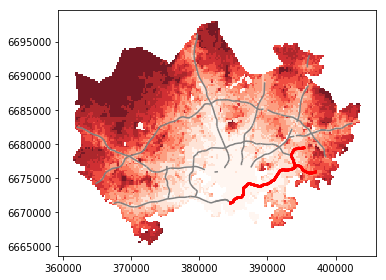

In [5]:
# Visualize the travel times into 9 classes using "Quantiles" classification scheme
# Add also a little bit of transparency with `alpha` parameter
# (ranges from 0 to 1 where 0 is fully transparent and 1 has no transparency)
my_map = grid.plot(column="car_r_t", linewidth=0.03, cmap="Reds", scheme="quantiles", k=9, alpha=0.9)

# Add roads on top of the grid
# (use ax parameter to define the map on top of which the second items are plotted)
roads.plot(ax=my_map, color="grey", linewidth=1.5)

# Add metro on top of the previous map
metro.plot(ax=my_map, color="red", linewidth=2.5)

# Remove the empty white-space around the axes
plt.tight_layout()

# Save the figure as png file with resolution of 300 dpi
outfp = r"Data/static_map.png"
plt.savefig(outfp, dpi=300)

# Interactive maps with Bokeh

### Simple interactive point plot

In [7]:
from bokeh.plotting import figure, save

# Initialize the plot (p) and give it a title
p = figure(title="My first interactive plot!")

# Let's see what it is
p

bokeh.plotting.figure.Figure(
    id='35aabb21-db16-46a3-a7b1-3a6db4d224f3',
    above=[],
    aspect_scale=1,
    background_fill_alpha={'value': 1.0},
    background_fill_color={'value': '#ffffff'},
    below=[bokeh.models.axes.LinearAxis(
         id='a5b3fe6f-2911-45a6-8bf0-8244322ab196',
         axis_label='',
         axis_label_standoff=5,
         axis_label_text_align='left',
         axis_label_text_alpha={'value': 1.0},
         axis_label_text_baseline='bottom',
         axis_label_text_color={'value': '#444444'},
         axis_label_text_font='helvetica',
         axis_label_text_font_size={'value': '10pt'},
         axis_label_text_font_style='italic',
         axis_label_text_line_height=1.2,
         axis_line_alpha={'value': 1.0},
         axis_line_cap='butt',
         axis_line_color={'value': 'black'},
         axis_line_dash=[],
         axis_line_dash_offset=0,
         axis_line_join='miter',
         axis_line_width={'value': 1},
         bounds='auto',
         fixed_location=None,
         formatter=bokeh.models.formatters.BasicTickFormatter(
             id='8236f0d3-aabf-429e-88cb-b577190236f8',
             js_event_callbacks={},
             js_property_callbacks={},
             name=None,
             power_limit_high=5,
             power_limit_low=-3,
             precision='auto',
             subscribed_events=[],
             tags=[],
             use_scientific=True),
         js_event_callbacks={},
         js_property_callbacks={},
         level='overlay',
         major_label_orientation='horizontal',
         major_label_overrides={},
         major_label_standoff=5,
         major_label_text_align='center',
         major_label_text_alpha={'value': 1.0},
         major_label_text_baseline='alphabetic',
         major_label_text_color={'value': '#444444'},
         major_label_text_font='helvetica',
         major_label_text_font_size={'value': '8pt'},
         major_label_text_font_style='normal',
         major_label_text_line_height=1.2,
         major_tick_in=2,
         major_tick_line_alpha={'value': 1.0},
         major_tick_line_cap='butt',
         major_tick_line_color={'value': 'black'},
         major_tick_line_dash=[],
         major_tick_line_dash_offset=0,
         major_tick_line_join='miter',
         major_tick_line_width={'value': 1},
         major_tick_out=6,
         minor_tick_in=0,
         minor_tick_line_alpha={'value': 1.0},
         minor_tick_line_cap='butt',
         minor_tick_line_color={'value': 'black'},
         minor_tick_line_dash=[],
         minor_tick_line_dash_offset=0,
         minor_tick_line_join='miter',
         minor_tick_line_width={'value': 1},
         minor_tick_out=4,
         name=None,
         plot=bokeh.plotting.figure.Figure(id='35aabb21-db16-46a3-a7b1-3a6db4d224f3', ...),
         subscribed_events=[],
         tags=[],
         ticker=bokeh.models.tickers.BasicTicker(
             id='2c8dfeca-ffb1-4578-9894-020ff3020765',
             base=10.0,
             desired_num_ticks=6,
             js_event_callbacks={},
             js_property_callbacks={},
             mantissas=[1, 2, 5],
             max_interval=None,
             min_interval=0.0,
             name=None,
             num_minor_ticks=5,
             subscribed_events=[],
             tags=[]),
         visible=True,
         x_range_name='default',
         y_range_name='default')],
    border_fill_alpha={'value': 1.0},
    border_fill_color={'value': '#ffffff'},
    css_classes=[],
    disabled=False,
    extra_x_ranges={},
    extra_y_ranges={},
    h_symmetry=True,
    height=None,
    hidpi=True,
    js_event_callbacks={},
    js_property_callbacks={},
    left=[bokeh.models.axes.LinearAxis(
         id='8cbe27f0-d795-40f6-a9fe-1c2858d6756c',
         axis_label='',
         axis_label_standoff=5,
         axis_label_text_align='left',
         axis_label_text_alpha={'value': 1.0},
         axis_label_text_baseline='bottom',
         axis_label_text_color

Next we need to create lists of x and y coordinates that we want to plot. We can plot those as points using a .circle() -object.

In [8]:
# Create a list of x-coordinates
x_coords = [0,1,2,3,4]

# Create a list of y-coordinates
y_coords = [5,4,1,2,0]

# Plot the points
p.circle(x=x_coords, y=y_coords, size=10, color="red")

bokeh.models.renderers.GlyphRenderer(
    id='a2279b97-e6ed-4133-80ca-e9a617dd1e2e',
    data_source=bokeh.models.sources.ColumnDataSource(
        id='0d032aaa-0bed-469f-bb53-abe2d397906c',
        callback=None,
        data={'y': [5, 4, 1, 2, 0], 'x': [0, 1, 2, 3, 4]},
        js_event_callbacks={},
        js_property_callbacks={},
        name=None,
        selected=bokeh.models.selections.Selection(
            id='d99f7507-af8e-443a-8c89-b38aec9a4dc6',
            indices=[],
            js_event_callbacks={},
            js_property_callbacks={},
            line_indices=[],
            multiline_indices={},
            name=None,
            subscribed_events=[],
            tags=[]),
        selection_policy=bokeh.models.selections.UnionRenderers(
            id='afb2b33c-6f13-424a-8d99-fe82b5467162',
            js_event_callbacks={},
            js_property_callbacks={},
            name=None,
            subscribed_events=[],
            tags=[]),
        subscribed_events=[],
        tags=[]),
    glyph=bokeh.models.markers.Circle(
        id='6f84676a-b684-48c0-b0ac-aff61d765866',
        angle={'value': 0.0, 'units': 'rad'},
        fill_alpha={'value': 1.0},
        fill_color={'value': 'red'},
        js_event_callbacks={},
        js_property_callbacks={},
        line_alpha={'value': 1.0},
        line_cap='butt',
        line_color={'value': 'red'},
        line_dash=[],
        line_dash_offset=0,
        line_join='miter',
        line_width={'value': 1},
        name=None,
        radius=None,
        radius_dimension='x',
        size={'value': 10, 'units': 'screen'},
        subscribed_events=[],
        tags=[],
        x={'field': 'x'},
        y={'field': 'y'}),
    hover_glyph=None,
    js_event_callbacks={},
    js_property_callbacks={},
    level='glyph',
    muted=False,
    muted_glyph=None,
    name=None,
    nonselection_glyph=bokeh.models.markers.Circle(
        id='06dc6147-43f9-400d-8358-411985f5e447',
        angle={'value': 0.0, 'units': 'rad'},
        fill_alpha={'value': 0.1},
        fill_color={'value': '#1f77b4'},
        js_event_callbacks={},
        js_property_callbacks={},
        line_alpha={'value': 0.1},
        line_cap='butt',
        line_color={'value': '#1f77b4'},
        line_dash=[],
        line_dash_offset=0,
        line_join='miter',
        line_width={'value': 1},
        name=None,
        radius=None,
        radius_dimension='x',
        size={'value': 10, 'units': 'screen'},
        subscribed_events=[],
        tags=[],
        x={'field': 'x'},
        y={'field': 'y'}),
    selection_glyph=None,
    subscribed_events=[],
    tags=[],
    view=bokeh.models.sources.CDSView(
        id='f1a02912-d646-4feb-8a52-6b93bfb23165',
        filters=[],
        js_event_callbacks={},
        js_property_callbacks={},
        name=None,
        source=bokeh.models.sources.ColumnDataSource(
            id='0d032aaa-0bed-469f-bb53-abe2d397906c',
            callback=None,
            data={'y': [5, 4, 1, 2, 0], 'x': [0, 1, 2, 3, 4]},
            js_event_callbacks={},
            js_property_callbacks={},
            name=None,
            selected=bokeh.models.selections.Selection(
                id='d99f7507-af8e-443a-8c89-b38aec9a4dc6',
                indices=[],
                js_event_callbacks={},
                js_property_callbacks={},
                line_indices=[],
                multiline_indices={},
                name=None,
                subscribed_events=[],
                tags=[]),
            selection_policy=bokeh.models.selections.UnionRenderers(
                id='afb2b33c-6f13-424a-8d99-fe82b5467162',
                js_event_callbacks={},
                js_property_callbacks={},
                name=None,
                subscribed_events=[],
                tags=[]),
            subscribed_events=[],
            tags=[]),
        subscribed_events=[],
        tags=[]),
    visible=True,
    x_range_name='default',
    y_range_name='de

Finally, we can save our interactive plot into the disk with save -function that we imported in the beginning. All interactive plots are typically saved as html files which you can open in a web-browser.

In [9]:
# Give output filepath
outfp = r"Output/points.html"

# Save the plot by passing the plot -object and output path
save(obj=p, filename=outfp)

C:\anaconda3\lib\site-packages\bokeh\io\saving.py:123: UserWarning: save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN
  warn("save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN")
C:\anaconda3\lib\site-packages\bokeh\io\saving.py:136: UserWarning: save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'
  warn("save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'")


'C:\\Git\\python-and-gis-class\\intro-to-python-gis\\Output\\points.html'

### Creating interactive maps using Bokeh and Geopandas

Creating an interactive Bokeh map from Shapefile(s) contains typically following steps:

1) Read the Shapefile into GeoDataFrame 

2) Calculate the x and y coordinates of the geometries into separate columns

3) Convert the GeoDataFrame into a Bokeh DataSource

4) Plot the x and y coordinates as points, lines or polygons (which are in Bokeh words: circle, multi_line and patches)

##### Point map

In [11]:
import geopandas as gpd

# File path
points_fp = r"Data/addresses.shp"

# Read the data
points = gpd.read_file(points_fp)

points.head()

,address,id,geometry
0,"Kampinkuja 1, 00100 Helsinki, Finland",1001,POINT (24.9301701 60.1683731)
1,"Kaivokatu 8, 00101 Helsinki, Finland",1002,POINT (24.9418933 60.1698665)
2,"Hermanstads strandsväg 1, 00580 Helsingfors, F...",1003,POINT (24.9774004 60.18735880000001)
3,"Itäväylä, 00900 Helsinki, Finland",1004,POINT (25.0919641 60.21448089999999)
4,"Tyynenmerenkatu 9, 00220 Helsinki, Finland",1005,POINT (24.9214846 60.1565781)


Now, as a second step, we need to calculate the x and y coordinates of those points. Unfortunately there is not a ready made function in geopandas to do that. Thus, let’s create our own function called getPointCoords() which will return the x or y coordinate of a given geometry.

In [12]:
def getPointCoords(row, geom, coord_type):
    """Calculates coordinates ('x' or 'y') of a Point geometry"""
    if coord_type == 'x':
        return row[geom].x
    elif coord_type == 'y':
        return row[geom].y

In [13]:
# Calculate x coordinates
points['x'] = points.apply(getPointCoords, geom='geometry', coord_type='x', axis=1)

# Calculate y coordinates
points['y'] = points.apply(getPointCoords, geom='geometry', coord_type='y', axis=1)

# Let's see what we have now
points.head()

,address,id,geometry,x,y
0,"Kampinkuja 1, 00100 Helsinki, Finland",1001,POINT (24.9301701 60.1683731),24.930170,60.168373
1,"Kaivokatu 8, 00101 Helsinki, Finland",1002,POINT (24.9418933 60.1698665),24.941893,60.169866
2,"Hermanstads strandsväg 1, 00580 Helsingfors, F...",1003,POINT (24.9774004 60.18735880000001),24.977400,60.187359
3,"Itäväylä, 00900 Helsinki, Finland",1004,POINT (25.0919641 60.21448089999999),25.091964,60.214481
4,"Tyynenmerenkatu 9, 00220 Helsinki, Finland",1005,POINT (24.9214846 60.1565781),24.921485,60.156578


The third step, is to convert our DataFrame into a format that Bokeh can understand. Thus, we will convert our DataFrame into ColumnDataSource which is a Bokeh-specific way of storing the data.

Bokeh ColumnDataSource do not understand Shapely geometry -objects. Thus, we need to remove the geometry -column before convert our DataFrame into a ColumnDataSouce.

In [17]:
# Make a copy and drop the geometry column
p_df = points.drop('geometry', axis=1).copy()

from bokeh.models import ColumnDataSource

# Point DataSource
psource = ColumnDataSource(p_df)

# What is it?
psource

bokeh.models.sources.ColumnDataSource

Finally, we can make a Point map of those points in a fairly similar manner as in the first example. Now instead of passing the coordinate lists, we can pass the data as a source for the plot with column names containing those coordinates.

In [19]:
# Initialize our plot figure
p = figure(title="A map of address points from a Shapefile")

# Add the points to the map from our 'psource' ColumnDataSource -object
p.circle('x', 'y', source=psource, color='red', size=10)

# Output filepath
outfp = r"Output/point_map.html"

# Save the map
save(p, outfp)

C:\anaconda3\lib\site-packages\bokeh\io\saving.py:123: UserWarning: save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN
  warn("save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN")
C:\anaconda3\lib\site-packages\bokeh\io\saving.py:136: UserWarning: save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'
  warn("save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'")


'C:\\Git\\python-and-gis-class\\intro-to-python-gis\\Output\\point_map.html'

##### Adding interactivity to the map

In Bokeh there are specific set of plot tools that you can add to the plot. Actually all the buttons that you see on the right side of the plot are exactly such tools. It is e.g. possible to interactively show information about the plot objects to the user when placing mouse over an object as you can see from the example on top of this page. The tool that shows information from the plot objects is an inspector called HoverTool that annotate or otherwise report information about the plot, based on the current cursor position.

In [21]:
from bokeh.models import HoverTool

# Initialize the tool
my_hover = HoverTool()

# Tell the tool what information it should show to us
my_hover.tooltips = [('Address of the point', '@address')]

From the above we can see that tooltip should be defined with a list of tuple(s) where the first item is the name or label for the information that will be shown, and the second item is the column-name where that information should be read in your data. The @ character in front of the column-name is important because it tells that the information should be taken from a column named as the text that comes after the character.

In [24]:
# Add tool to the current plot
p.add_tools(my_hover)

# File path
outfp = r"Output/point_map_hover.html"

save(p, outfp)

C:\anaconda3\lib\site-packages\bokeh\io\saving.py:123: UserWarning: save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN
  warn("save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN")
C:\anaconda3\lib\site-packages\bokeh\io\saving.py:136: UserWarning: save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'
  warn("save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'")


'C:\\Git\\python-and-gis-class\\intro-to-python-gis\\Output\\point_map_hover.html'

### Line map

In [26]:
import geopandas as gpd

# File path
metro_fp = r"Data/metro.shp"

# Read the data
metro = gpd.read_file(metro_fp)

metro.head()

,NUMERO,SUUNTA,geometry
0,1300M,1,LINESTRING (2561676.997249531 6681346.00195433...
1,1300M,2,LINESTRING (2550919.001803585 6672692.00211347...
2,1300M1,1,LINESTRING (2561676.997249531 6681346.00195433...
3,1300M1,2,LINESTRING (2559946.003624604 6678095.99842650...
4,1300M2,1,LINESTRING (2559946.003624604 6678095.99842650...


Let’s create our own function called getLineCoords() in a similar manner as previously but now we need to modify it a bit so that we can get coordinates out of the Shapely LineString object.

In [27]:
def getLineCoords(row, geom, coord_type):
    """Returns a list of coordinates ('x' or 'y') of a LineString geometry"""
    if coord_type == 'x':
        return list( row[geom].coords.xy[0] )
    elif coord_type == 'y':
        return list( row[geom].coords.xy[1] )

By default Shapely returns the coordinates as a numpy array of the coordinates. Bokeh does not understand arrays, hence we need to convert the array into a list which is why we apply list() -function.

In [28]:
# Calculate x coordinates of the line
metro['x'] = metro.apply(getLineCoords, geom='geometry', coord_type='x', axis=1)

# Calculate y coordinates of the line
metro['y'] = metro.apply(getLineCoords, geom='geometry', coord_type='y', axis=1)

# Let's see what we have now
metro.head()

,NUMERO,SUUNTA,geometry,x,y
0,1300M,1,LINESTRING (2561676.997249531 6681346.00195433...,"[2561676.997249531, 2560202.997150008, 2560127...","[6681346.001954339, 6681016.996685321, 6680969..."
1,1300M,2,LINESTRING (2550919.001803585 6672692.00211347...,"[2550919.001803585, 2551145.9991329825, 255126...","[6672692.002113477, 6672713.997145447, 6672737..."
2,1300M1,1,LINESTRING (2561676.997249531 6681346.00195433...,"[2561676.997249531, 2560202.997150008, 2560127...","[6681346.001954339, 6681016.996685321, 6680969..."
3,1300M1,2,LINESTRING (2559946.003624604 6678095.99842650...,"[2559946.003624604, 2560094.9990514405, 256018...","[6678095.998426503, 6678179.9976436375, 667824..."
4,1300M2,1,LINESTRING (2559946.003624604 6678095.99842650...,"[2559946.003624604, 2559644.0031698933, 255947...","[6678095.998426503, 6678008.998522878, 6677957..."


In [29]:
# Make a copy and drop the geometry column
m_df = metro.drop('geometry', axis=1).copy()

# Point DataSource
msource = ColumnDataSource(m_df)

Finally, we can make a map of the metro line and save it in a similar manner as earlier but now instead of plotting circle we need to use a .multiline() -object

In [30]:
# Initialize our plot figure
p = figure(title="A map of the Helsinki metro")

# Add the lines to the map from our 'msource' ColumnDataSource -object
p.multi_line('x', 'y', source=msource, color='red', line_width=3)

# Output filepath
outfp = "Output/metro_map.html"

# Save the map
save(p, outfp)

C:\anaconda3\lib\site-packages\bokeh\io\saving.py:123: UserWarning: save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN
  warn("save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN")
C:\anaconda3\lib\site-packages\bokeh\io\saving.py:136: UserWarning: save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'
  warn("save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'")


'C:\\Git\\python-and-gis-class\\intro-to-python-gis\\Output\\metro_map.html'

In [31]:
from bokeh.models import HoverTool

# Initialize the tool
my_hover = HoverTool()

# Tell the tool what information it should show to us
my_hover.tooltips = [('Metroline', '@NUMERO')]

# Add tool to the current plot
p.add_tools(my_hover)

# File path
outfp = r"Output/metro_map_hover.html"

save(p, outfp)

C:\anaconda3\lib\site-packages\bokeh\io\saving.py:123: UserWarning: save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN
  warn("save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN")
C:\anaconda3\lib\site-packages\bokeh\io\saving.py:136: UserWarning: save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'
  warn("save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'")


'C:\\Git\\python-and-gis-class\\intro-to-python-gis\\Output\\metro_map_hover.html'

### Polygon map with Points and Lines

1st step: Import necessary modules and read the Shapefiles.

In [33]:
from bokeh.plotting import figure, save
from bokeh.models import ColumnDataSource, HoverTool, LogColorMapper
import geopandas as gpd
import pysal as ps

# File paths
grid_fp = r"Data/TravelTimes_to_5975375_RailwayStation.shp"
point_fp = r"Data/addresses.shp"
metro_fp = r"Data/metro.shp"

# Read files
grid = gpd.read_file(grid_fp)
points = gpd.read_file(point_fp)
metro = gpd.read_file(metro_fp)

In [35]:
# Get the CRS of our grid
CRS = grid.crs
print(CRS)

# Convert the geometries of metro line and points into that one
points['geometry'] = points['geometry'].to_crs(crs=CRS)
metro['geometry'] = metro['geometry'].to_crs(crs=CRS)

{'init': 'epsg:3067'}


In [36]:
def getPolyCoords(row, geom, coord_type):
    """Returns the coordinates ('x' or 'y') of edges of a Polygon exterior"""

    # Parse the exterior of the coordinate
    exterior = row[geom].exterior

    if coord_type == 'x':
        # Get the x coordinates of the exterior
        return list( exterior.coords.xy[0] )
    elif coord_type == 'y':
        # Get the y coordinates of the exterior
        return list( exterior.coords.xy[1] )

2nd step: Let’s now apply the functions that we have created and parse the x and y coordinates for all of our datasets.

In [37]:
# Get the Polygon x and y coordinates
grid['x'] = grid.apply(getPolyCoords, geom='geometry', coord_type='x', axis=1)
grid['y'] = grid.apply(getPolyCoords, geom='geometry', coord_type='y', axis=1)

# Calculate x and y coordinates of the line
metro['x'] = metro.apply(getLineCoords, geom='geometry', coord_type='x', axis=1)
metro['y'] = metro.apply(getLineCoords, geom='geometry', coord_type='y', axis=1)

# Calculate x and y coordinates of the points
points['x'] = points.apply(getPointCoords, geom='geometry', coord_type='x', axis=1)
points['y'] = points.apply(getPointCoords, geom='geometry', coord_type='y', axis=1)

In [39]:
grid[['x', 'y']].head()

,x,y
0,"[382000.00013586413, 381750.0001359122, 381750...","[6697750.000038058, 6697750.000038066, 6698000..."
1,"[382250.0001358146, 382000.00013586413, 382000...","[6697750.000038053, 6697750.000038058, 6698000..."
2,"[382500.0001357661, 382250.0001358146, 382250....","[6697750.000038046, 6697750.000038053, 6698000..."
3,"[382750.0001357181, 382500.0001357661, 382500....","[6697750.000038039, 6697750.000038046, 6698000..."
4,"[381250.0001360176, 381000.00013606605, 381000...","[6697500.000038121, 6697500.0000381265, 669775..."


Let’s now classify the travel times of our grid into 5 minute intervals until 200 minutes using a pysal classifier called User_Defined that allows to set our own criteria for class intervals. But first we need to replace the No Data values with a large number so that they wouldn’t be seen as the “best” accessible areas.

In [42]:
# Replace No Data values (-1) with large number (999)
grid = grid.replace(-1, 999)

# Classify our travel times into 5 minute classes until 200 minutes
# Create a list of values where minumum value is 5, maximum value is 200 and step is 5.
breaks = [x for x in range(5, 200, 5)]

# Initialize the classifier and apply it
classifier = ps.User_Defined.make(bins=breaks)
pt_classif = grid[['pt_r_tt']].apply(classifier)

# Rename the classified column
pt_classif.columns = ['pt_r_tt_ud']

# Join it back to the grid layer
grid = grid.join(pt_classif)

In [44]:
grid.head()

,car_m_d,car_m_t,car_r_d,car_r_t,from_id,pt_m_d,pt_m_t,pt_m_tt,pt_r_d,pt_r_t,pt_r_tt,to_id,walk_d,walk_t,geometry,x,y,pt_r_tt_ud
0,32297,43,32260,48,5785640,32616,116,147,32616,108,139,5975375,32164,459,"POLYGON ((382000.0001358641 6697750.000038058,...","[382000.00013586413, 381750.0001359122, 381750...","[6697750.000038058, 6697750.000038066, 6698000...",27
1,32508,43,32471,49,5785641,32822,119,145,32822,111,133,5975375,29547,422,"POLYGON ((382250.0001358146 6697750.000038053,...","[382250.0001358146, 382000.00013586413, 382000...","[6697750.000038053, 6697750.000038058, 6698000...",26
2,30133,50,31872,56,5785642,32940,121,146,32940,113,133,5975375,29626,423,"POLYGON ((382500.0001357661 6697750.000038046,...","[382500.0001357661, 382250.0001358146, 382250....","[6697750.000038046, 6697750.000038053, 6698000...",26
3,32690,54,34429,60,5785643,33233,125,150,33233,117,144,5975375,29919,427,"POLYGON ((382750.0001357181 6697750.000038039,...","[382750.0001357181, 382500.0001357661, 382500....","[6697750.000038039, 6697750.000038046, 6698000...",28
4,31872,42,31834,48,5787544,32127,109,126,32127,101,121,5975375,31674,452,"POLYGON ((381250.0001360176 6697500.000038121,...","[381250.0001360176, 381000.00013606605, 381000...","[6697500.000038121, 6697500.0000381265, 669775...",24


3rd step: Let’s now convert our GeoDataFrames into Bokeh ColumnDataSources (without geometry columns)

In [45]:
# Make a copy, drop the geometry column and create ColumnDataSource
m_df = metro.drop('geometry', axis=1).copy()
msource = ColumnDataSource(m_df)

# Make a copy, drop the geometry column and create ColumnDataSource
p_df = points.drop('geometry', axis=1).copy()
psource = ColumnDataSource(p_df)

# Make a copy, drop the geometry column and create ColumnDataSource
g_df = grid.drop('geometry', axis=1).copy()
gsource = ColumnDataSource(g_df)

4th step: For visualizing the Polygons we need to define the color palette that we are going to use. There are many different ones available but we are now going to use a palette called RdYlBu and use eleven color-classes for the values (defined as RdYlBu11). Let’s prepare our color_mapper.

In [46]:
# Let's first do some coloring magic that converts the color palet into map numbers (it's okey not to understand)
from bokeh.palettes import RdYlBu11 as palette
from bokeh.models import LogColorMapper

# Create the color mapper
color_mapper = LogColorMapper(palette=palette)

In [47]:
# Initialize our figure
p = figure(title="Travel times with Public transportation to Central Railway station")

# Plot grid
p.patches('x', 'y', source=gsource,
         fill_color={'field': 'pt_r_tt_ud', 'transform': color_mapper},
         fill_alpha=1.0, line_color="black", line_width=0.05)

# Add metro on top of the same figure
p.multi_line('x', 'y', source=msource, color="red", line_width=2)

# Add points on top (as black points)
p.circle('x', 'y', size=3, source=psource, color="black")

# Save the figure
outfp = r"Output/travel_time_map.html"
save(p, outfp)

C:\anaconda3\lib\site-packages\bokeh\io\saving.py:123: UserWarning: save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN
  warn("save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN")
C:\anaconda3\lib\site-packages\bokeh\io\saving.py:136: UserWarning: save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'
  warn("save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'")


'C:\\Git\\python-and-gis-class\\intro-to-python-gis\\Output\\travel_time_map.html'

# Advanced plotting with Bokeh

In [61]:
from bokeh.palettes import YlOrRd6 as palette
from bokeh.plotting import figure, save
from bokeh.models import ColumnDataSource, HoverTool, LogColorMapper, GeoJSONDataSource
from bokeh.palettes import RdYlGn10 as palette
import geopandas as gpd
import pysal as ps
import numpy as np

# Filepaths
fp = r"Data/TravelTimes_to_5975375_RailwayStation.shp"
roads_fp = r"Data/roads.shp"
metro_fp = r"Data/metro.shp"

data = gpd.read_file(fp)
roads = gpd.read_file(roads_fp)
metro = gpd.read_file(metro_fp)

data['geometry'] = data['geometry'].to_crs(epsg=3067)
roads['geometry'] = roads['geometry'].to_crs(epsg=3067)
metro['geometry'] = metro['geometry'].to_crs(epsg=3067)

Next, let’s create a set of functions that are used for getting the x and y coordinates of the geometries. Shapefiles etc. can often have Multi-geometries (MultiLineStrings etc.), thus we need to handle those as well which makes things slightly more complicated.

In [62]:
def getXYCoords(geometry, coord_type):
    """ Returns either x or y coordinates from  geometry coordinate sequence. Used with LineString and Polygon geometries."""
    if coord_type == 'x':
        return geometry.coords.xy[0]
    elif coord_type == 'y':
        return geometry.coords.xy[1]

def getPolyCoords(geometry, coord_type):
    """ Returns Coordinates of Polygon using the Exterior of the Polygon."""
    ext = geometry.exterior
    return getXYCoords(ext, coord_type)

def getLineCoords(geometry, coord_type):
    """ Returns Coordinates of Linestring object."""
    return getXYCoords(geometry, coord_type)

def getPointCoords(geometry, coord_type):
    """ Returns Coordinates of Point object."""
    if coord_type == 'x':
        return geometry.x
    elif coord_type == 'y':
        return geometry.y

def multiGeomHandler(multi_geometry, coord_type, geom_type):
    """
    Function for handling multi-geometries. Can be MultiPoint, MultiLineString or MultiPolygon.
    Returns a list of coordinates where all parts of Multi-geometries are merged into a single list.
    Individual geometries are separated with np.nan which is how Bokeh wants them.
    # Bokeh documentation regarding the Multi-geometry issues can be found here (it is an open issue)
    # https://github.com/bokeh/bokeh/issues/2321
    """

    for i, part in enumerate(multi_geometry):
        # On the first part of the Multi-geometry initialize the coord_array (np.array)
        if i == 0:
            if geom_type == "MultiPoint":
                coord_arrays = np.append(getPointCoords(part, coord_type), np.nan)
            elif geom_type == "MultiLineString":
                coord_arrays = np.append(getLineCoords(part, coord_type), np.nan)
            elif geom_type == "MultiPolygon":
                coord_arrays = np.append(getPolyCoords(part, coord_type), np.nan)
        else:
            if geom_type == "MultiPoint":
                coord_arrays = np.concatenate([coord_arrays, np.append(getPointCoords(part, coord_type), np.nan)])
            elif geom_type == "MultiLineString":
                coord_arrays = np.concatenate([coord_arrays, np.append(getLineCoords(part, coord_type), np.nan)])
            elif geom_type == "MultiPolygon":
                coord_arrays = np.concatenate([coord_arrays, np.append(getPolyCoords(part, coord_type), np.nan)])

    # Return the coordinates
    return coord_arrays


def getCoords(row, geom_col, coord_type):
    """
    Returns coordinates ('x' or 'y') of a geometry (Point, LineString or Polygon) as a list (if geometry is LineString or Polygon).
    Can handle also MultiGeometries.
    """
    # Get geometry
    geom = row[geom_col]

    # Check the geometry type
    gtype = geom.geom_type

    # "Normal" geometries
    # -------------------

    if gtype == "Point":
        return getPointCoords(geom, coord_type)
    elif gtype == "LineString":
        return list( getLineCoords(geom, coord_type) )
    elif gtype == "Polygon":
        return list( getPolyCoords(geom, coord_type) )

    # Multi geometries
    # ----------------

    else:
        return list( multiGeomHandler(geom, coord_type, gtype) )

Now we can apply our functions and calculate the x and y coordinates of any kind of geometry by using the same function, i.e. getCoords().

In [63]:
data['x'] = data.apply(getCoords, geom_col="geometry", coord_type="x", axis=1)
data['y'] = data.apply(getCoords, geom_col="geometry", coord_type="y", axis=1)
    
roads['x'] = roads.apply(getCoords, geom_col="geometry", coord_type="x", axis=1)
roads['y'] = roads.apply(getCoords, geom_col="geometry", coord_type="y", axis=1)  

metro['x'] = metro.apply(getCoords, geom_col="geometry", coord_type="x", axis=1)
metro['y'] = metro.apply(getCoords, geom_col="geometry", coord_type="y", axis=1)

In [64]:
data.head()

,car_m_d,car_m_t,car_r_d,car_r_t,from_id,pt_m_d,pt_m_t,pt_m_tt,pt_r_d,pt_r_t,pt_r_tt,to_id,walk_d,walk_t,geometry,x,y
0,32297,43,32260,48,5785640,32616,116,147,32616,108,139,5975375,32164,459,"POLYGON ((382000.0001358641 6697750.000038058,...","[382000.00013586413, 381750.0001359122, 381750...","[6697750.000038058, 6697750.000038066, 6698000..."
1,32508,43,32471,49,5785641,32822,119,145,32822,111,133,5975375,29547,422,"POLYGON ((382250.0001358146 6697750.000038052,...","[382250.0001358146, 382000.00013586413, 382000...","[6697750.000038052, 6697750.000038058, 6698000..."
2,30133,50,31872,56,5785642,32940,121,146,32940,113,133,5975375,29626,423,"POLYGON ((382500.0001357661 6697750.000038046,...","[382500.0001357661, 382250.0001358146, 382250....","[6697750.000038046, 6697750.000038052, 6698000..."
3,32690,54,34429,60,5785643,33233,125,150,33233,117,144,5975375,29919,427,"POLYGON ((382750.0001357181 6697750.000038039,...","[382750.0001357181, 382500.0001357661, 382500....","[6697750.000038039, 6697750.000038046, 6698000..."
4,31872,42,31834,48,5787544,32127,109,126,32127,101,121,5975375,31674,452,"POLYGON ((381250.0001360176 6697500.00003812, ...","[381250.00013601757, 381000.00013606605, 38100...","[6697500.00003812, 6697500.000038126, 6697750...."


Next, we need to classify the travel time values into 5 minute intervals using Pysal’s user defined classifier. We also create legend labels for the classes

In [65]:
# Replace No Data values (-1) with large numbers (999)
data = data.replace(-1, 999)

# Classify travel times with 5 minute intervals until 200 minutes
breaks = [x for x in range(5, 200, 5)]
classifier = ps.User_Defined.make(bins=breaks)
pt_classif = data[['pt_r_tt']].apply(classifier)
car_classif = data[['car_r_t']].apply(classifier)

pt_classif.columns = ['pt_r_tt_ud']
car_classif.columns = ['car_r_t_ud']

# Join classes back to the main data
data = data.join(pt_classif)
data = data.join(car_classif)
                 
# Create names for the legend
upper_limit = 60
step = 5
names = ["%s-%s " % (x-5, x) for x in range(step, upper_limit, step)]

# Add legend label for over 60                 
names.append("%s <" % upper_limit)

# Assign legend names for the classes
data['label_pt'] = None
data['label_car'] = None

# Update rows with class-names
for i in range(len(names)):
    data.loc[data['pt_r_tt_ud'] == i, 'label_pt'] = names[i]
    data.loc[data['car_r_t_ud'] == i, 'label_car'] = names[i]
    
# Update all cells that didn’t get any value with "60 <"
data['label_pt'] = data['label_pt'].fillna("%s <" % upper_limit)
data['label_car'] = data['label_car'].fillna("%s <" % upper_limit)

In [66]:
data

,car_m_d,car_m_t,car_r_d,car_r_t,from_id,pt_m_d,pt_m_t,pt_m_tt,pt_r_d,pt_r_t,...,to_id,walk_d,walk_t,geometry,x,y,pt_r_tt_ud,car_r_t_ud,label_pt,label_car
0,32297,43,32260,48,5785640,32616,116,147,32616,108,...,5975375,32164,459,"POLYGON ((382000.0001358641 6697750.000038058,...","[382000.00013586413, 381750.0001359122, 381750...","[6697750.000038058, 6697750.000038066, 6698000...",27,9,60 <,45-50
1,32508,43,32471,49,5785641,32822,119,145,32822,111,...,5975375,29547,422,"POLYGON ((382250.0001358146 6697750.000038052,...","[382250.0001358146, 382000.00013586413, 382000...","[6697750.000038052, 6697750.000038058, 6698000...",26,9,60 <,45-50
2,30133,50,31872,56,5785642,32940,121,146,32940,113,...,5975375,29626,423,"POLYGON ((382500.0001357661 6697750.000038046,...","[382500.0001357661, 382250.0001358146, 382250....","[6697750.000038046, 6697750.000038052, 6698000...",26,11,60 <,60 <
3,32690,54,34429,60,5785643,33233,125,150,33233,117,...,5975375,29919,427,"POLYGON ((382750.0001357181 6697750.000038039,...","[382750.0001357181, 382500.0001357661, 382500....","[6697750.000038039, 6697750.000038046, 6698000...",28,11,60 <,60 <
4,31872,42,31834,48,5787544,32127,109,126,32127,101,...,5975375,31674,452,"POLYGON ((381250.0001360176 6697500.00003812, ...","[381250.00013601757, 381000.00013606605, 38100...","[6697500.00003812, 6697500.000038126, 6697750....",24,9,60 <,45-50
5,32158,45,32121,51,5787545,32196,110,131,32196,102,...,5975375,31743,453,"POLYGON ((381500.0001359679 6697500.000038114,...","[381500.00013596786, 381250.00013601757, 38125...","[6697500.000038114, 6697500.00003812, 6697750....",24,10,60 <,50-55
6,29159,47,30898,53,5787546,32422,114,137,32422,106,...,5975375,31969,457,"POLYGON ((381750.0001359189 6697500.00003811, ...","[381750.0001359189, 381500.00013596786, 381500...","[6697500.00003811, 6697500.000038114, 6697750....",27,10,60 <,50-55
7,29551,46,31290,52,5787547,33321,126,148,33321,118,...,5975375,29433,420,"POLYGON ((382000.0001358707 6697500.000038098,...","[382000.00013587065, 381750.0001359189, 381750...","[6697500.000038098, 6697500.00003811, 6697750....",28,10,60 <,50-55
8,29672,45,31411,51,5787548,33048,122,144,33048,114,...,5975375,29208,417,"POLYGON ((382250.0001358215 6697500.000038098,...","[382250.0001358215, 382000.00013587065, 382000...","[6697500.000038098, 6697500.000038098, 6697750...",26,10,60 <,50-55
9,29915,47,31654,53,5787549,33341,127,148,33341,119,...,5975375,29342,419,"POLYGON ((382500.0001357736 6697500.000038088,...","[382500.00013577356, 382250.0001358215, 382250...","[6697500.000038088, 6697500.000038098, 6697750...",28,10,60 <,50-55


Finally, we can visualize our layers with Bokeh, add a legend for travel times and add HoverTools for Destination Point and the grid values (travel times).

In [81]:
# Select only necessary columns for our plotting to keep the amount of data minumum
df = data[['x', 'y', 'pt_r_tt_ud', 'pt_r_tt', 'car_r_t', 'from_id', 'label_pt']]
dfsource = ColumnDataSource(data=df)

# Include only coordinates from roads (exclude 'geometry' column)
rdf = roads[['x', 'y']]
rdfsource = ColumnDataSource(data=rdf)

# Include only coordinates from metro (exclude 'geometry' column)
mdf = metro[['x','y']]
mdfsource = ColumnDataSource(data=mdf)

# Specify the tools that we want to use
TOOLS = "pan,wheel_zoom,box_zoom,reset,save"

# Flip the colors in color palette
palette.reverse()
color_mapper = LogColorMapper(palette=palette)

p = figure(title="Travel times to Helsinki city center by public transportation", tools=TOOLS,
           plot_width=650, plot_height=500, active_scroll = "wheel_zoom" )

# Do not add grid line
p.grid.grid_line_color = None

# Add polygon grid and a legend for it
grid = p.patches('x', 'y', source=dfsource, name="grid",
         fill_color={'field': 'pt_r_tt_ud', 'transform': color_mapper},
         fill_alpha=1.0, line_color="black", line_width=0.03, legend="label_pt")

# Add roads
r = p.multi_line('x', 'y', source=rdfsource, color="grey")

# Add metro
m = p.multi_line('x', 'y', source=mdfsource, color="red")

# Modify legend location
p.legend.location = "top_right"
p.legend.orientation = "vertical"

# Insert a circle on top of the Central Railway Station (coords in EurefFIN-TM35FIN)
station_x = 385752.214
station_y =  6672143.803
circle = p.circle(x=[station_x], y=[station_y], name="point", size=6, color="yellow")

# Add two separate hover tools for the data
phover = HoverTool(renderers=[circle])
phover.tooltips=[("Destination", "Railway Station")]

ghover = HoverTool(renderers=[grid])
ghover.tooltips=[("YKR-ID", "@from_id"),
                ("PT time", "@pt_r_tt"),
                ("Car time", "@car_r_t"),
               ]

p.add_tools(ghover)
p.add_tools(phover)

# Output filepath to HTML
output_file = r"Output/accessibility_map_Helsinki.html"

# Save the map
save(p, output_file)

KeyError: "['x' 'y'] not in index"

Alternative: Bokeh nowadays support GeoJSONDataSource that makes it much easier to work and plot data from GeoDataFrame. Take a look of the following example:

In [80]:
import geopandas as gpd
from bokeh.plotting import save, figure
from bokeh.models import GeoJSONDataSource

addresses_fp = r'Data/addresses.shp'
roads_fp = r'Data/roads.shp'

# Read the data
addresses = gpd.read_file(addresses_fp)
roads = gpd.read_file(roads_fp)

# Reproject to the same projection
CRS = roads.crs
addresses = addresses.to_crs(crs=CRS)

# Convert GeoDataFrames into GeoJSONDataSource objects (similar to ColumnDataSource)
point_source = GeoJSONDataSource(geojson=addresses.to_json())
roads_source = GeoJSONDataSource(geojson=roads.to_json())

# Initialize our plot figure
p = figure(title="A test map")

# Add the lines to the map from our GeoJSONDataSource -object (it is important to specify the columns as 'xs' and 'ys')
p.multi_line('xs', 'ys', source=roads_source, color='gray', line_width=3)

# Add the lines to the map from our 'msource' ColumnDataSource -object
p.circle('x', 'y', source=point_source, color='black', size=6)

# Output filepath
outfp = r"Output\test_map.html"

# Save the map
save(p, outfp)

C:\anaconda3\lib\site-packages\bokeh\io\saving.py:123: UserWarning: save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN
  warn("save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN")
C:\anaconda3\lib\site-packages\bokeh\io\saving.py:136: UserWarning: save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'
  warn("save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'")


'C:\\Git\\python-and-gis-class\\intro-to-python-gis\\Output\\test_map.html'